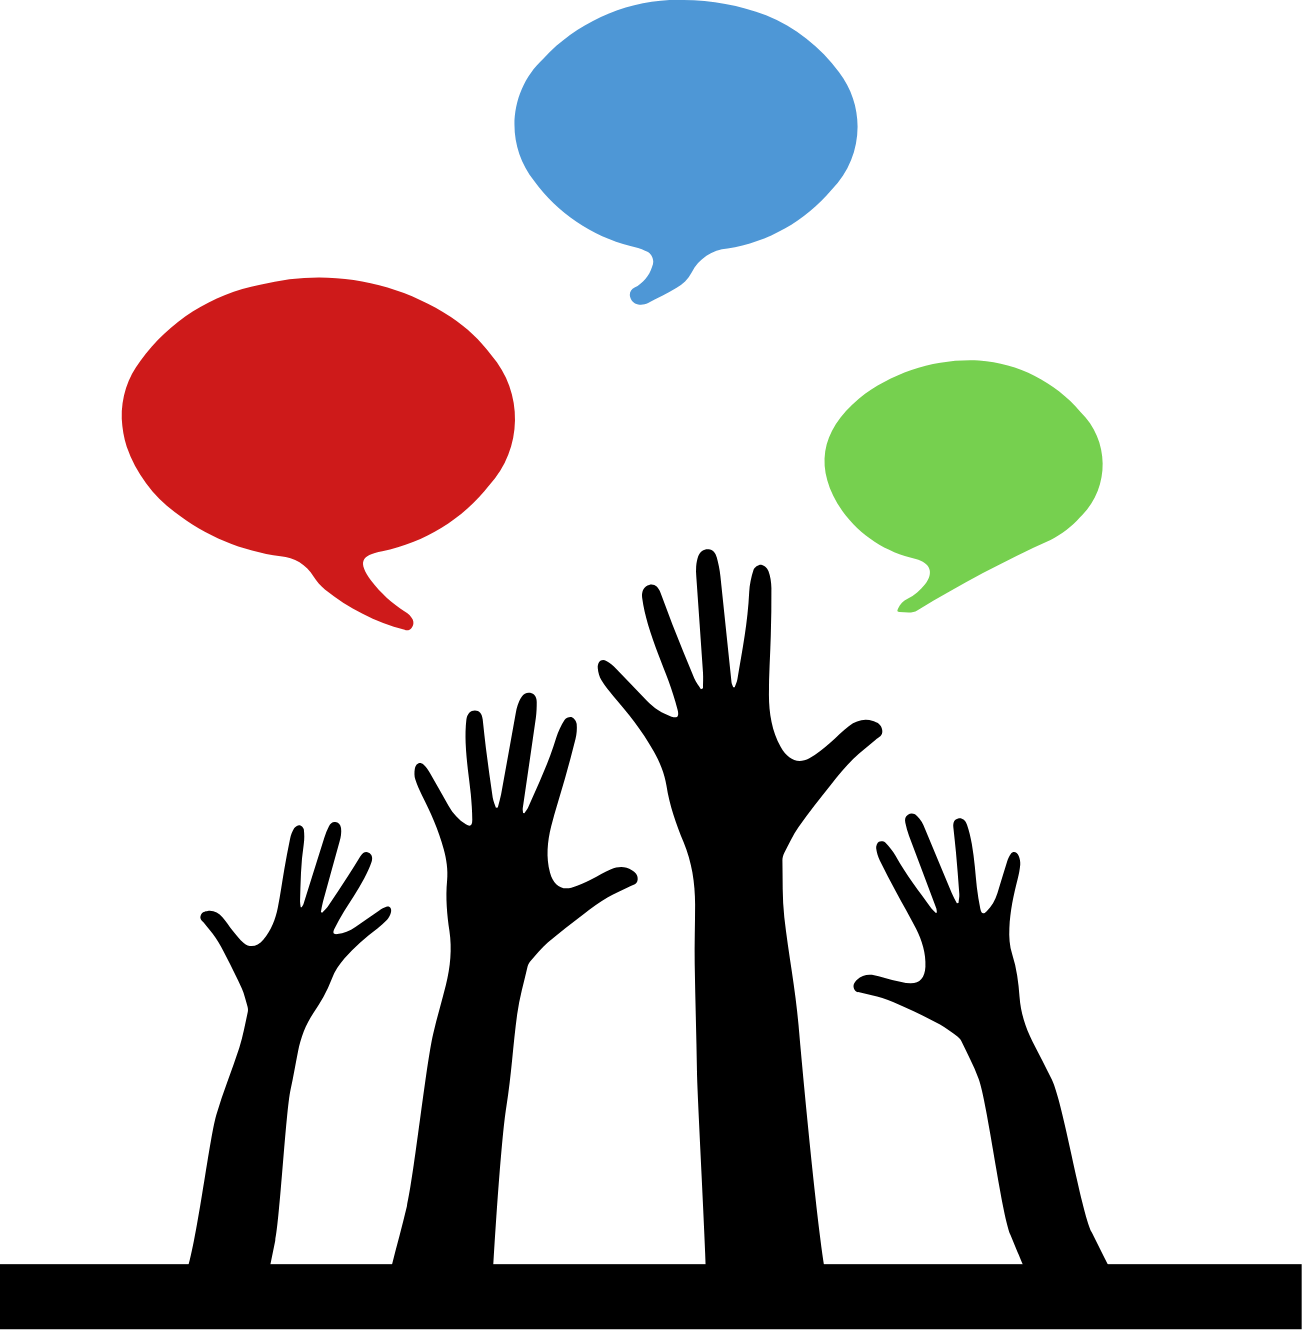

In [155]:
from IPython.display import Image
Image(filename='sparks.jpg')

# Author : Bhoi Arpan Ashutosh

# Exploratory Data Analysis - IPL Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(16,8)
sns.set_style('darkgrid')

In [2]:
raw_data=pd.read_csv('matches.csv')
raw_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
raw_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [150]:
raw_data.drop(['date'],axis=1,inplace=True)

In [141]:
raw_data.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [127]:
raw_data.isnull().any()

season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [139]:
raw_data[['umpire1','umpire2','umpire3']].fillna('Sundaram Ravi')

,umpire1,umpire2,umpire3
0,AY Dandekar,NJ Llong,Sundaram Ravi
1,A Nand Kishore,S Ravi,Sundaram Ravi
2,Nitin Menon,CK Nandan,Sundaram Ravi
3,AK Chaudhary,C Shamshuddin,Sundaram Ravi
4,Sundaram Ravi,Sundaram Ravi,Sundaram Ravi
...,...,...,...
751,Nanda Kishore,O Nandan,S Ravi
752,Nigel Llong,Nitin Menon,Ian Gould
753,Sundaram Ravi,Sundaram Ravi,Sundaram Ravi
754,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
my_season=raw_data.drop(raw_data[raw_data.season<2010].index)
my_season.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
Name: season, dtype: int64

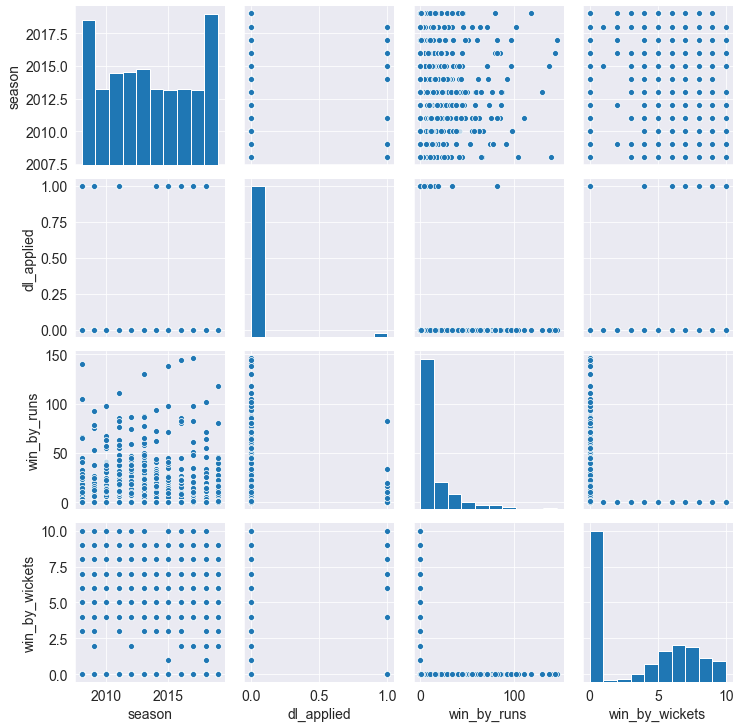

In [102]:
sns.pairplot(raw_data)

In [142]:
team=my_season[['winner','win_by_runs','win_by_wickets']]
team_df=my_season.season==2010

In [143]:
new_team=team[team_df]
new_df=new_team.sort_values(by=['winner'],ascending=False)
new_df.winner.value_counts()

Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challengers Bangalore     8
Delhi Daredevils                7
Kolkata Knight Riders           7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64

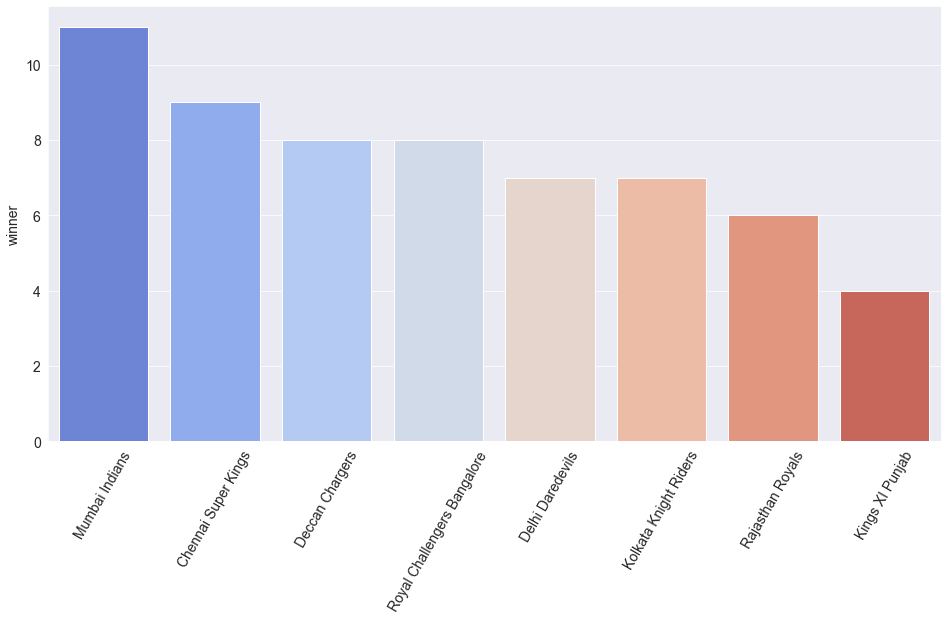

In [144]:
plt.xticks(rotation=60)
sns.barplot(x=new_df.winner.value_counts().index,y=new_df.winner.value_counts(),palette='coolwarm')

In [145]:
raw_data.venue.value_counts().head(10)

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

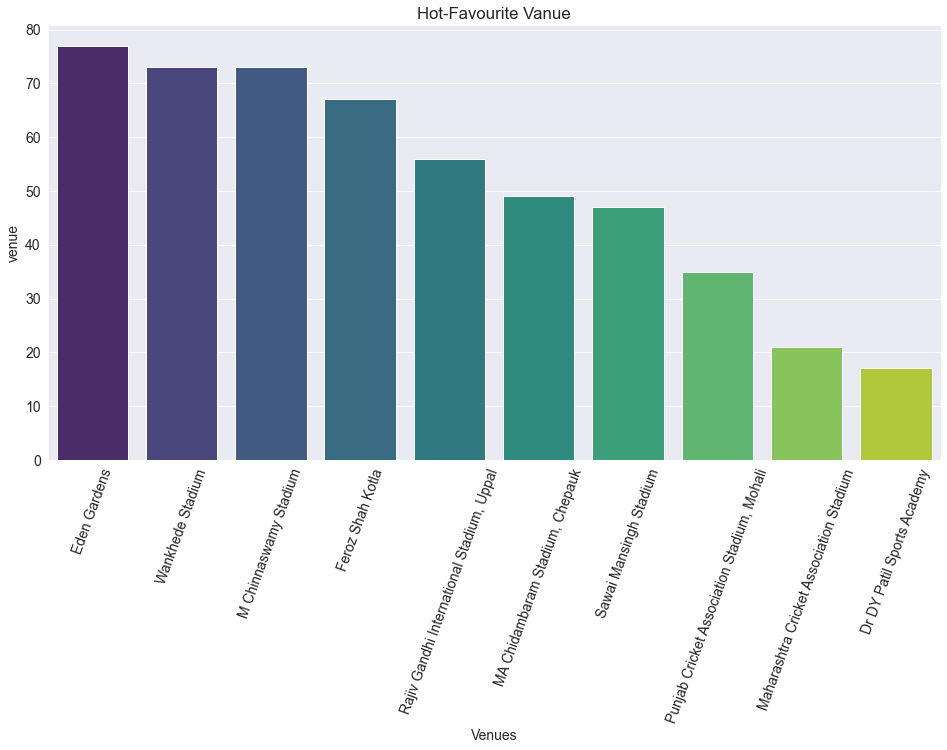

In [61]:
plt.xticks(rotation=70)
plt.xlabel('Venues')
plt.title('Hot-Favourite Vanue')
sns.barplot(x=raw_data.venue.value_counts().head(10).index,y=raw_data.venue.value_counts().head(10),palette='viridis')

In [10]:
team=my_season[['winner','win_by_runs','win_by_wickets','toss_decision','dl_applied']]
team_df=my_season.season==2012

In [11]:
new_team=team[team_df]
new_df=new_team.sort_values(by=['winner'],ascending=False)
new_df

,winner,win_by_runs,win_by_wickets,toss_decision,dl_applied
328,Royal Challengers Bangalore,0,6,bat,0
359,Royal Challengers Bangalore,0,9,field,0
361,Royal Challengers Bangalore,35,0,field,0
311,Royal Challengers Bangalore,20,0,field,0
332,Royal Challengers Bangalore,0,5,field,0
...,...,...,...,...,...
351,Chennai Super Kings,10,0,bat,0
367,Chennai Super Kings,0,5,field,0
333,Chennai Super Kings,0,7,bat,0
331,Chennai Super Kings,13,0,field,0


In [12]:
new_df.toss_decision.value_counts()

field    37
bat      37
Name: toss_decision, dtype: int64

In [13]:
new_df.dl_applied.value_counts()

0    74
Name: dl_applied, dtype: int64

In [14]:
whe=raw_data[['season','winner','dl_applied']]
whe_df=raw_data.dl_applied==1

In [15]:
app=whe[whe_df]
app_df=app.sort_values(by=['season'],ascending=False)
app_df

,season,winner,dl_applied
667,2018,Delhi Daredevils,1
641,2018,Rajasthan Royals,1
653,2018,Kings XI Punjab,1
56,2017,Kolkata Knight Riders,1
597,2016,Rising Pune Supergiants,1
620,2016,Kolkata Knight Riders,1
624,2016,Rising Pune Supergiants,1
625,2016,Royal Challengers Bangalore,1
536,2015,Sunrisers Hyderabad,1
567,2015,Royal Challengers Bangalore,1


In [16]:
app_df.winner.value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Delhi Daredevils               2
Chennai Super Kings            2
Kings XI Punjab                2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

# PLAYER_OF_MATCH IN IPL

In [17]:
raw_data.player_of_match.value_counts().head(10)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

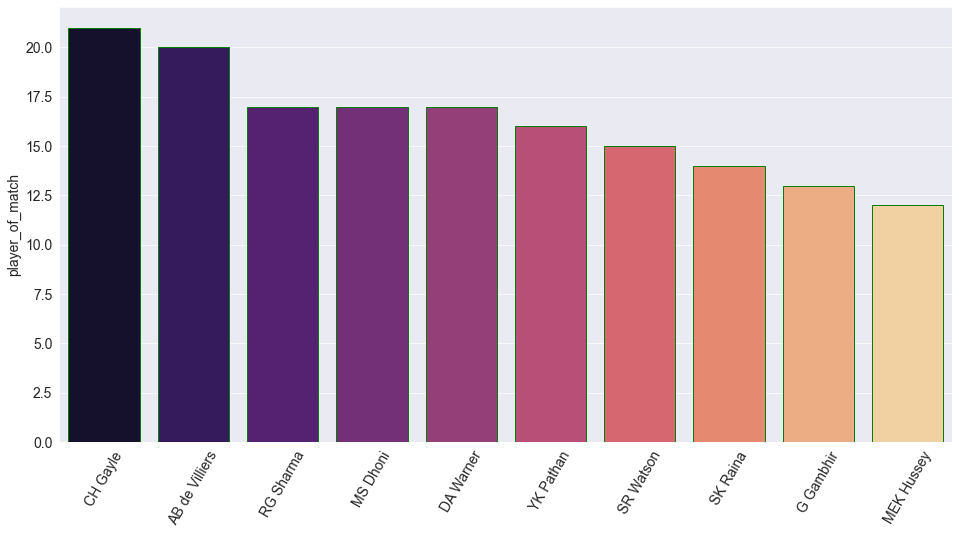

In [44]:
plt.xticks(rotation=60)
sns.barplot(x=raw_data.player_of_match.value_counts().head(10).index,y=raw_data.player_of_match.value_counts().head(10),palette='magma',edgecolor='green')

Most Player of Match award in 2019.

In [19]:
rec=raw_data[['winner','player_of_match']]
rec_df=raw_data.season==2019

In [20]:
year=rec[rec_df]
year_df=year.sort_values(by=['winner'],ascending=False)
year_df

,winner,player_of_match
706,Sunrisers Hyderabad,J Bairstow
728,Sunrisers Hyderabad,DA Warner
743,Sunrisers Hyderabad,DA Warner
711,Sunrisers Hyderabad,J Bairstow
733,Sunrisers Hyderabad,K Ahmed
703,Sunrisers Hyderabad,Rashid Khan
749,Royal Challengers Bangalore,S Hetmyer
723,Royal Challengers Bangalore,AB de Villiers
737,Royal Challengers Bangalore,AB de Villiers
730,Royal Challengers Bangalore,V Kohli


In [21]:
year_df.player_of_match.value_counts()

AD Russell         4
MS Dhoni           3
HH Pandya          3
JJ Bumrah          3
RR Pant            3
Harbhajan Singh    2
J Bairstow         2
DA Warner          2
S Dhawan           2
KL Rahul           2
AB de Villiers     2
SR Watson          2
DL Chahar          1
KA Pollard         1
S Hetmyer          1
K Paul             1
R Ashwin           1
VR Aaron           1
SS Iyer            1
SPD Smith          1
A Joseph           1
K Ahmed            1
RG Sharma          1
SL Malinga         1
Imran Tahir        1
JC Buttler         1
P Shaw             1
V Kohli            1
S Curran           1
Rashid Khan        1
CH Gayle           1
A Mishra           1
AS Yadav           1
F du Plessis       1
MA Agarwal         1
K Rabada           1
H Gurney           1
JD Unadkat         1
S Gopal            1
S Gill             1
PA Patel           1
Name: player_of_match, dtype: int64

In [22]:
year_df.winner.value_counts()

Mumbai Indians                 11
Delhi Capitals                 10
Chennai Super Kings            10
Sunrisers Hyderabad             6
Kings XI Punjab                 6
Kolkata Knight Riders           6
Rajasthan Royals                5
Royal Challengers Bangalore     5
Name: winner, dtype: int64

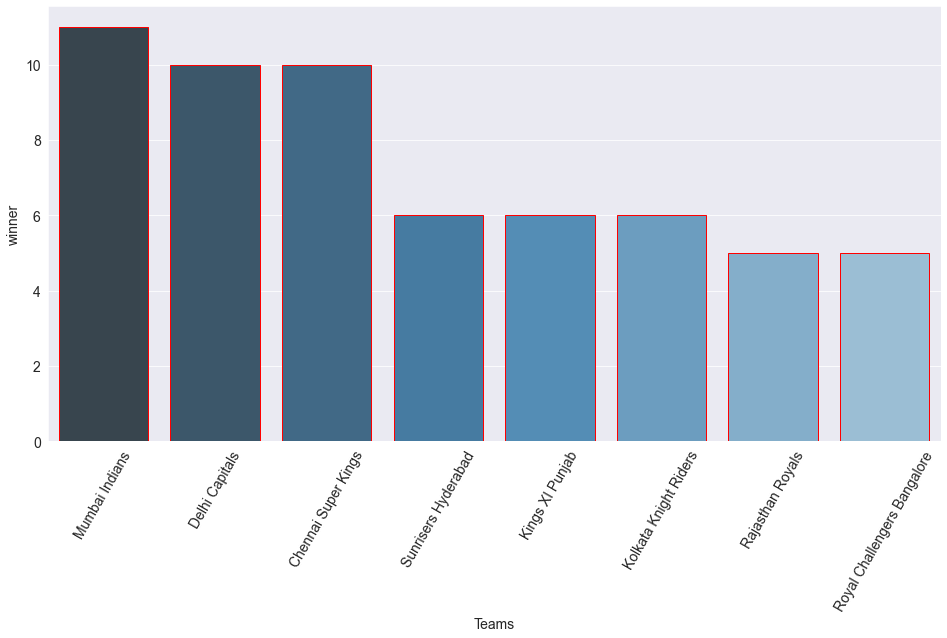

In [51]:
plt.xticks(rotation=60)
plt.xlabel('Teams')
sns.barplot(x=year_df.winner.value_counts().index,y=year_df.winner.value_counts(),palette='Blues_d',edgecolor='red')


In [28]:
raw_data

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [29]:
raw_data.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

# Which Team has Won the Most Matches By Taking Bat First?

In [68]:
dec=raw_data[['venue','winner','season']]
dec_df=raw_data.toss_decision=='bat'

In [34]:
bat=dec[dec_df]
bat_df=bat.sort_values(by=['season'],ascending=False)
bat_df

,venue,winner,season
755,Rajiv Gandhi Intl. Cricket Stadium,Mumbai Indians,2019
729,Feroz Shah Kotla Ground,Mumbai Indians,2019
703,Rajiv Gandhi Intl. Cricket Stadium,Sunrisers Hyderabad,2019
713,M. A. Chidambaram Stadium,Chennai Super Kings,2019
728,Rajiv Gandhi Intl. Cricket Stadium,Sunrisers Hyderabad,2019
...,...,...,...
113,"Rajiv Gandhi International Stadium, Uppal",Chennai Super Kings,2008
115,Wankhede Stadium,Chennai Super Kings,2008
77,Sawai Mansingh Stadium,Rajasthan Royals,2008
79,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,2008


In [35]:
bat_df.winner.value_counts()

Chennai Super Kings            52
Mumbai Indians                 45
Kolkata Knight Riders          35
Rajasthan Royals               34
Delhi Daredevils               29
Royal Challengers Bangalore    26
Sunrisers Hyderabad            21
Kings XI Punjab                21
Deccan Chargers                14
Pune Warriors                   9
Gujarat Lions                   2
Delhi Capitals                  2
Rising Pune Supergiants         2
Name: winner, dtype: int64

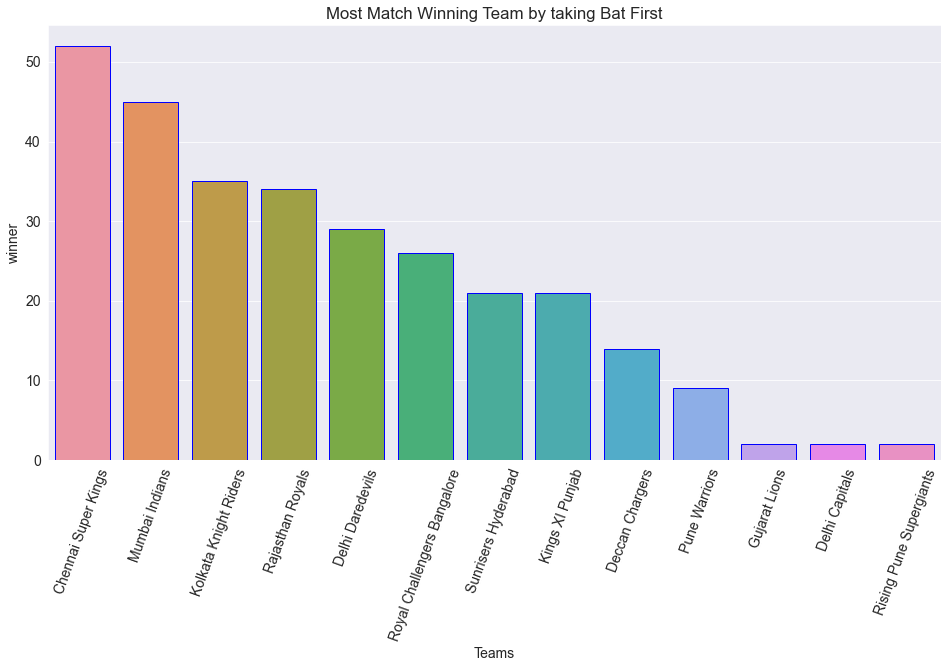

In [42]:
plt.xticks(rotation=70)
plt.xlabel('Teams')
plt.title('Most Match Winning Team by taking Bat First')
sns.barplot(x=bat_df.winner.value_counts().index,y=bat_df.winner.value_counts(),edgecolor='blue')

# Which Team has Won the Most Matches By Taking Field First?

In [46]:
dec1=raw_data[['venue','winner','season']]
dec1_df=raw_data.toss_decision=='field'

In [47]:
fie=dec1[dec1_df]
fie_df=fie.sort_values(by=['season'],ascending=False)
fie_df

,venue,winner,season
754,ACA-VDCA Stadium,Chennai Super Kings,2019
710,Wankhede Stadium,Mumbai Indians,2019
721,Eden Gardens,Delhi Capitals,2019
720,Sawai Mansingh Stadium,Chennai Super Kings,2019
719,Wankhede Stadium,Mumbai Indians,2019
...,...,...,...
101,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,2008
103,M Chinnaswamy Stadium,Delhi Daredevils,2008
104,Eden Gardens,Rajasthan Royals,2008
105,Wankhede Stadium,Kings XI Punjab,2008


In [49]:
fie_df.winner.value_counts()

Mumbai Indians                 64
Kings XI Punjab                61
Royal Challengers Bangalore    58
Kolkata Knight Riders          57
Chennai Super Kings            48
Rajasthan Royals               41
Delhi Daredevils               38
Sunrisers Hyderabad            37
Deccan Chargers                15
Gujarat Lions                  11
Rising Pune Supergiant         10
Delhi Capitals                  8
Kochi Tuskers Kerala            6
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

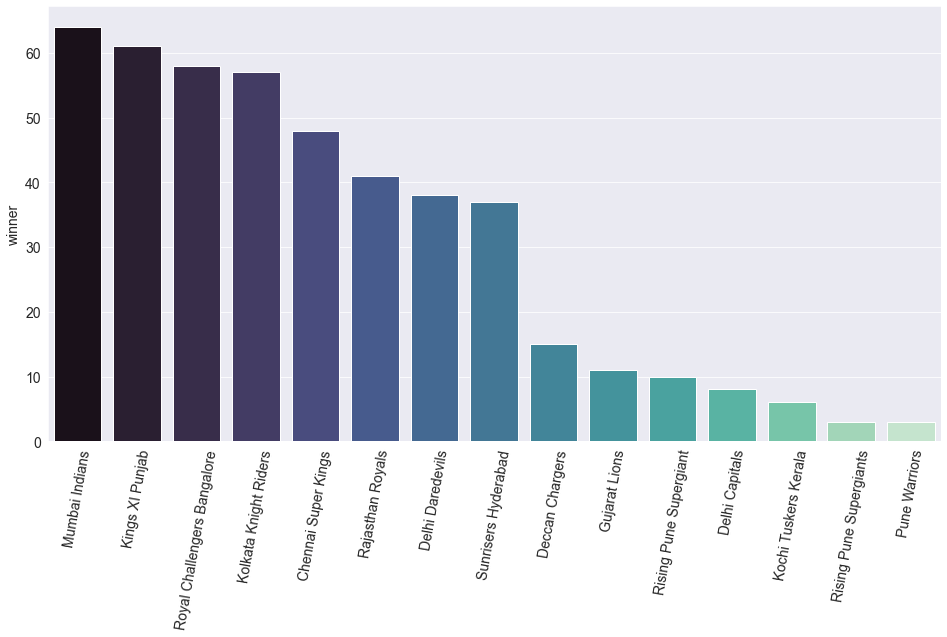

In [54]:
plt.xticks(rotation=80)
sns.barplot(x=fie_df.winner.value_counts().index,y=fie_df.winner.value_counts(),palette='mako')

In [72]:
toss=raw_data[['toss_winner','player_of_match']]
toss_df=raw_data.toss_decision=='bat'

In [73]:
bet=toss[toss_df]
bet_df=bet.sort_values(by=['toss_winner'],ascending=False)
bet_df

,toss_winner,player_of_match
563,Sunrisers Hyderabad,DA Warner
663,Sunrisers Hyderabad,KS Williamson
567,Sunrisers Hyderabad,V Kohli
560,Sunrisers Hyderabad,MC Henriques
571,Sunrisers Hyderabad,MJ McClenaghan
...,...,...
288,Chennai Super Kings,MS Dhoni
82,Chennai Super Kings,Sohail Tanvir
148,Chennai Super Kings,ML Hayden
498,Chennai Super Kings,AB de Villiers


In [86]:
bet_df.player_of_match.value_counts().head(10)

G Gambhir         9
MS Dhoni          8
JH Kallis         8
MEK Hussey        7
SK Raina          7
AB de Villiers    7
YK Pathan         7
SR Watson         6
V Sehwag          6
DA Warner         6
Name: player_of_match, dtype: int64

([<matplotlib.patches.Wedge at 0x270c05f2d60>,
 [Text(-1.0777697164541664, -0.22002826703472947, 'G Gambhir'),
  Text(1.716490573899163e-08, -1.0999999999999999, 'MS Dhoni'),
  Text(1.056569932713014, -0.3060391760654462, 'JH Kallis'),
  Text(0.6608164431613011, 0.8793870754381412, 'MEK Hussey'),
  Text(-0.5111955675802603, 0.9740015871066616, 'SK Raina')],
 [Text(-0.5878743907931816, -0.1200154183825797, '23.1%'),
  Text(9.362675857631796e-09, -0.5999999999999999, '20.5%'),
  Text(0.5763108723889167, -0.16693045967206155, '20.5%'),
  Text(0.36044533263343687, 0.47966567751171335, '17.9%'),
  Text(-0.2788339459528692, 0.53127359296727, '17.9%')])

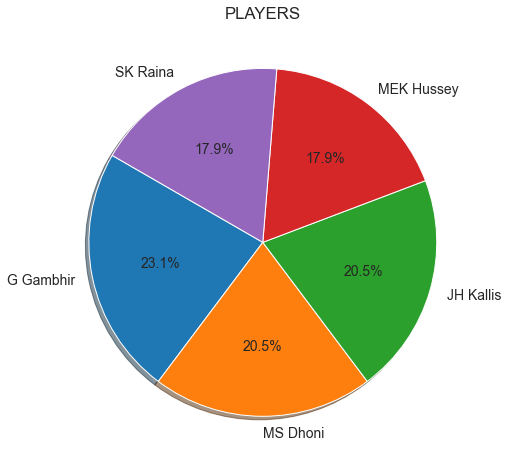

In [148]:
plt.title('PLAYERS')
plt.pie(bet_df['player_of_match'].value_counts().head(), labels=bet_df['player_of_match'].value_counts().head().index,autopct='%1.1f%%',shadow=True,startangle=150)

In [89]:
bet_df.toss_winner.value_counts()

Chennai Super Kings            48
Mumbai Indians                 44
Rajasthan Royals               32
Kolkata Knight Riders          30
Delhi Daredevils               29
Kings XI Punjab                26
Deccan Chargers                24
Sunrisers Hyderabad            20
Royal Challengers Bangalore    20
Pune Warriors                  11
Kochi Tuskers Kerala            3
Rising Pune Supergiants         3
Delhi Capitals                  2
Gujarat Lions                   1
Name: toss_winner, dtype: int64

([<matplotlib.patches.Wedge at 0x270bcc389a0>,
 [Text(1.0445499974587786, 0.5906905304885679, 'Chennai Super Kings'),
  Text(0.08356508708316869, 1.1970868290231844, 'Mumbai Indians'),
  Text(-0.813733871820535, 0.8819507842572404, 'Rajasthan Royals'),
  Text(-1.1845131999471956, 0.19216784109432822, 'Kolkata Knight Riders'),
  Text(-1.068915587533199, -0.5453617760061263, 'Delhi Daredevils'),
  Text(-0.5850820670263687, -1.047701758538255, 'Kings XI Punjab'),
  Text(0.03216272519770513, -1.1995689055272551, 'Deccan Chargers'),
  Text(0.5738151978825499, -1.0539146638504515, 'Sunrisers Hyderabad'),
  Text(0.960123589427843, -0.7198351846250604, 'Royal Challengers Bangalore'),
  Text(1.1424547591540555, -0.36714727737823344, 'Pune Warriors'),
  Text(1.1845132179392421, -0.1921677301921985, 'Kochi Tuskers Kerala'),
  Text(1.274044870322794, -0.1233274843827392, 'Rising Pune Supergiants'),
  Text(1.2688321451775662, -0.054451697531813344, 'Delhi Capitals'),
  Text(1.259927574776314, -0.01

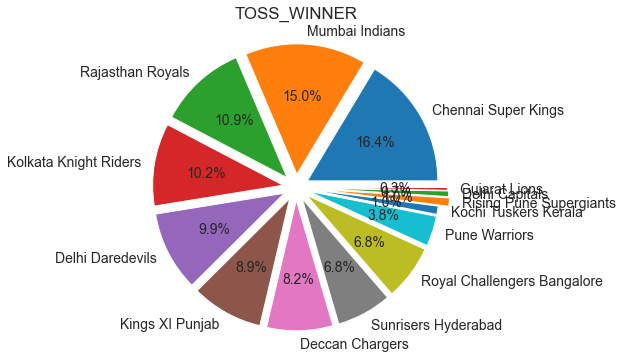

In [92]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
ex=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.18,0.17,0.16)
plt.title('TOSS_WINNER')
plt.pie(bet_df['toss_winner'].value_counts(), labels=bet_df['toss_winner'].value_counts().index,autopct='%1.1f%%',explode=ex)

In [103]:
raw_data

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [119]:
team=raw_data[['toss_winner','winner','win_by_runs','win_by_wickets','toss_decision']]
team_df=raw_data.toss_decision=='bat'

In [120]:
csk=team[team_df]
csk_df=csk.sort_values(by=['win_by_runs'],ascending=False)
csk_df

,toss_winner,winner,win_by_runs,win_by_wickets,toss_decision
295,Kings XI Punjab,Kings XI Punjab,111,0,bat
541,Chennai Super Kings,Chennai Super Kings,97,0,bat
464,Chennai Super Kings,Chennai Super Kings,93,0,bat
121,Chennai Super Kings,Chennai Super Kings,92,0,bat
131,Mumbai Indians,Mumbai Indians,92,0,bat
...,...,...,...,...,...
409,Rajasthan Royals,Chennai Super Kings,0,5,bat
412,Kolkata Knight Riders,Mumbai Indians,0,5,bat
413,Sunrisers Hyderabad,Chennai Super Kings,0,5,bat
414,Kings XI Punjab,Kolkata Knight Riders,0,6,bat


In [121]:
csk_df.winner.value_counts()

Chennai Super Kings            52
Mumbai Indians                 45
Kolkata Knight Riders          35
Rajasthan Royals               34
Delhi Daredevils               29
Royal Challengers Bangalore    26
Sunrisers Hyderabad            21
Kings XI Punjab                21
Deccan Chargers                14
Pune Warriors                   9
Delhi Capitals                  2
Gujarat Lions                   2
Rising Pune Supergiants         2
Name: winner, dtype: int64

([<matplotlib.patches.Wedge at 0x270c0a0cdc0>,
 [Text(0.9879111799530969, 0.4837680234613281, 'Mumbai Indians'),
  Text(0.26393358858840527, 1.0678665931729705, 'Chennai Super Kings'),
  Text(-0.584123164342328, 0.932094484952414, 'Kolkata Knight Riders'),
  Text(-1.058450924134978, 0.29946893194087976, 'Royal Challengers Bangalore'),
  Text(-1.005397793117458, -0.4462905752920907, 'Kings XI Punjab'),
  Text(-0.524605323356602, -0.9668450003521325, 'Rajasthan Royals'),
  Text(0.10553204184873356, -1.0949260194840733, 'Delhi Daredevils'),
  Text(0.6376088225019216, -0.8963565080188314, 'Sunrisers Hyderabad'),
  Text(0.9146165949894981, -0.6111272242093432, 'Deccan Chargers'),
  Text(1.007253493369899, -0.44208641699800627, 'Gujarat Lions'),
  Text(1.0478530986488637, -0.3346698128782679, 'Pune Warriors'),
  Text(1.0741461813830273, -0.23708644208444513, 'Rising Pune Supergiant'),
  Text(1.0901852418806335, -0.14661561439923335, 'Delhi Capitals'),
  Text(1.0975435690056097, -0.0734718594

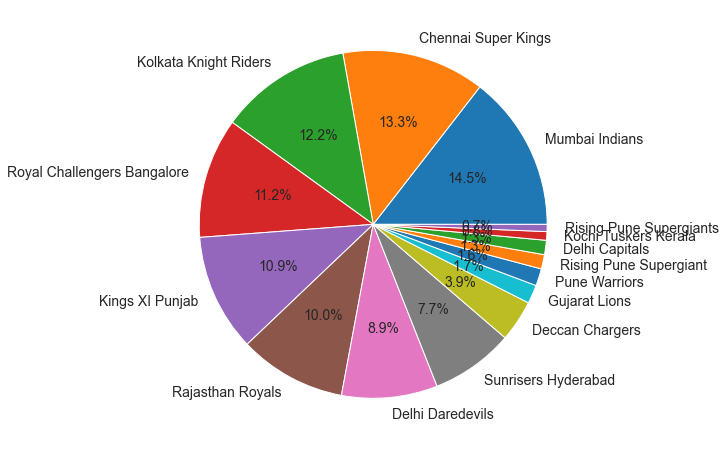

In [154]:
plt.pie(raw_data['winner'].value_counts(),labels=raw_data['winner'].value_counts().index,autopct='%1.1f%%')